In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme='chesterish', context='notebook', ticks=True, grid=False)



In [93]:
raw_data = pd.read_csv('train.csv')
raw_data.shape
raw_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
raw_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# Explore data

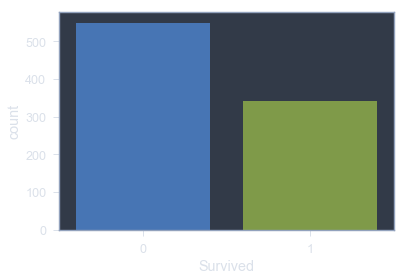

In [4]:
sns.countplot(raw_data['Survived'])
plt.show()

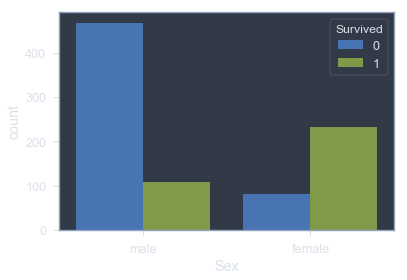

In [5]:
sns.countplot(raw_data['Sex'], hue=raw_data['Survived'])
plt.show()

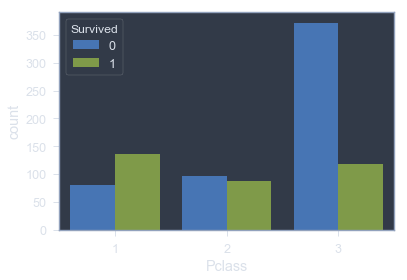

In [6]:
sns.countplot(raw_data['Pclass'], hue=raw_data['Survived'])
plt.show()

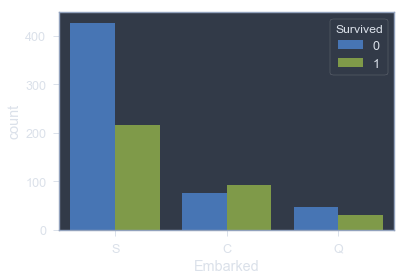

In [7]:
sns.countplot(raw_data['Embarked'], hue=raw_data['Survived'])
plt.show()

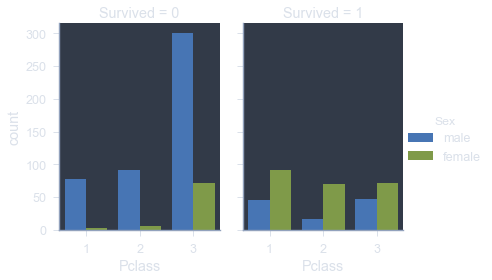

In [8]:
sns.catplot(x="Pclass", hue="Sex", col="Survived",
                data=raw_data, kind="count",
                height=4, aspect=.7)
plt.show()

In [69]:
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [164]:
data = raw_data.copy()

In [165]:
data['Title'] = data['Name'].str.split(', ', expand=True)[1]
data['Title'] = data['Title'].str.split('. ', expand=True)[0]
data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'th', 'Jonkheer'],
      dtype=object)

In [166]:
pd.crosstab(data['Title'], data['Sex']).T.style.background_gradient(cmap='summer_r')

Title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,th
Sex,,,,,,,,,,,,,,,,,
female,0,0,0,1,0,1,0,0,182,2,1,0,125,1,0,0,1
male,1,2,1,6,1,0,2,40,0,0,0,517,0,0,6,1,0


In [167]:
pd.crosstab(data['Title'], data['Survived']).T.style.background_gradient(cmap='summer_r')

Title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,th
Survived,,,,,,,,,,,,,,,,,
0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [168]:
data.groupby(['Title'])['Age'].mean()

Title
Capt        70.000000
Col         58.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.773973
Mlle        24.000000
Mme         24.000000
Mr          32.368090
Mrs         35.898148
Ms          28.000000
Rev         43.166667
Sir         49.000000
th          33.000000
Name: Age, dtype: float64

In [169]:
data['Title_c'] = data['Title'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 
'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'th', 'Jonkheer'],
                                        ['Mr', 'Mrs', 'Miss', 'Master', 'Mr', 'Mr', 'Mr',
'Miss', 'Miss', 'Mr', 'Miss', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr'])
data['Title_c'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [170]:
#data['Sex'].replace({'female':1, 'male':0},inplace=True)

In [171]:
data_d = data.drop(['Name','Title'], axis=1)
data_d.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_c
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [172]:
from sklearn.ensemble import RandomForestRegressor
 
def set_missing_ages(df):
        
    df['Sex'].replace({'female':1, 'male':0},inplace=True)
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    df['Embarked'] = df['Embarked'].fillna('S')
    
    # 把數值型特徵放入 Random Forest Regressor中
    age_df = df[['Age', 'Fare', 'Sex', 'Parch', 'SibSp', 'Pclass']]

    # 乘客分成已知以及未知年齡
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()
    
    # y即目標年龄
    y = known_age[:, 0]

    # X即特徵屬性質
    X = known_age[:, 1:]

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)

    # 預測未知年齡
    predictedAges = rfr.predict(unknown_age[:, 1:])
    #  print predictedAges
    # 用預測結果彌補缺失值
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
        
    return df

In [173]:
data_nm = set_missing_ages(data_d)

/usr/local/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
/usr/local/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [175]:
data_nm_d = data_nm.drop(['PassengerId','Ticket', 'Cabin'], axis=1)

In [176]:
data_dummies = pd.get_dummies(data_nm_d)
data_dummies.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title_c_Master,Title_c_Miss,Title_c_Mr,Title_c_Mrs
0,0,3,0,22.0,1,0,7.2500,0,0,1,0,0,1,0
1,1,1,1,38.0,1,0,71.2833,1,0,0,0,0,0,1
2,1,3,1,26.0,0,0,7.9250,0,0,1,0,1,0,0
3,1,1,1,35.0,1,0,53.1000,0,0,1,0,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1,0,0,1,0


In [177]:
targets = data_dummies['Survived']
targets.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [178]:
unscaled_inputs = data_dummies.iloc[:,1:]
unscaled_inputs.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title_c_Master,Title_c_Miss,Title_c_Mr,Title_c_Mrs
0,3,0,22.0,1,0,7.2500,0,0,1,0,0,1,0
1,1,1,38.0,1,0,71.2833,1,0,0,0,0,0,1
2,3,1,26.0,0,0,7.9250,0,0,1,0,1,0,0
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,1,0,0,1,0


In [179]:
unscaled_inputs.shape

(891, 13)

# Standardize

In [180]:
# with dummy variables

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
# you dont need to understand, you only need to know how to use
class CustomScaler(BaseEstimator, TransformerMixin):
    
    def __init__(self, columns, copy=True, with_mean=True, with_std=True):
        self.scaler = StandardScaler(copy, with_mean, with_std)
        self.columns = columns
        self.mean_ = None
        self.var_ = None
        
    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self
    
    def transform(self, X, y=None, copy=None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        X_not_scaled = X.loc[:, ~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [181]:
unscaled_inputs.columns.values

array(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Title_c_Master', 'Title_c_Miss',
       'Title_c_Mr', 'Title_c_Mrs'], dtype=object)

In [182]:
# 把數值型資料進行標準化
column_to_scale = ['Age', 'SibSp', 'Parch', 'Fare']

In [183]:
titanic_scaler = CustomScaler(column_to_scale)

In [184]:
titanic_scaler.fit(unscaled_inputs)

/usr/local/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


CustomScaler(columns=['Age', 'SibSp', 'Parch', 'Fare'], copy=None,
             with_mean=None, with_std=None)

In [185]:
scaled_inputs = titanic_scaler.transform(unscaled_inputs)

In [186]:
scaled_inputs.shape

(891, 13)

In [187]:
scaled_inputs.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title_c_Master,Title_c_Miss,Title_c_Mr,Title_c_Mrs
0,3,0,-0.556275,0.432793,-0.473674,-0.502445,0,0,1,0,0,1,0
1,1,1,0.612791,0.432793,-0.473674,0.786845,1,0,0,0,0,0,1
2,3,1,-0.264008,-0.474545,-0.473674,-0.488854,0,0,1,0,1,0,0
3,1,1,0.393591,0.432793,-0.473674,0.420730,0,0,1,0,0,0,1
4,3,0,0.393591,-0.474545,-0.473674,-0.486337,0,0,1,0,0,1,0


In [188]:
from sklearn.model_selection import train_test_split

In [246]:
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, 
                                                    train_size=0.8, random_state=330)

In [247]:
print(x_train.shape, y_train.shape)

print(x_test.shape, y_test.shape)

(712, 13) (712,)
(179, 13) (179,)


In [248]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [249]:
reg = LogisticRegression()

reg.fit(x_train, y_train)

print(reg.score(x_train, y_train))

0.8398876404494382


In [250]:
model_ouputs = reg.predict(x_train)
print(model_ouputs)

[0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1
 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1
 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1
 0 1 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0
 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0
 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0
 1 0 0 0 1 0 0 0 0 0 1 0 

In [251]:
print(reg.coef_[0])

print(reg.intercept_[0])

[-1.13178353  1.22391262 -0.28890327 -0.53606456 -0.26595577  0.12781969
  0.21349396  0.07351463 -0.28655449  1.27114454 -0.0427667  -1.8701509
  0.64222716]
2.664016432508009


In [252]:
feature_name = unscaled_inputs.columns.values
print(feature_name)

['Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked_C' 'Embarked_Q'
 'Embarked_S' 'Title_c_Master' 'Title_c_Miss' 'Title_c_Mr' 'Title_c_Mrs']


In [253]:
summary_table = pd.DataFrame(columns=['feature_name'], data=feature_name)
summary_table['Coefficient'] = np.transpose(reg.coef_)

summary_table.index = summary_table.index+1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()

# more high odds ratio is more important
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)
summary_table.sort_values('Odds_ratio', ascending=False)

summary_table

,feature_name,Coefficient,Odds_ratio
0,Intercept,2.664016,14.353825
1,Pclass,-1.131784,0.322458
2,Sex,1.223913,3.400466
3,Age,-0.288903,0.749085
4,SibSp,-0.536065,0.585046
5,Parch,-0.265956,0.766473
6,Fare,0.127820,1.136348
7,Embarked_C,0.213494,1.237996
8,Embarked_Q,0.073515,1.076284
9,Embarked_S,-0.286554,0.750846


In [255]:
y_pred = reg.predict(x_test)
#np.sum(y_pred == y_test)/y_test.shape[0]
reg.score(x_test, y_test)

0.7988826815642458

# RandomForest

In [256]:
data_rf = data_nm.copy()
data_rf['Title_c'] = data_rf['Title_c'].astype('category').cat.codes
data_rf['Embarked'] = data_rf['Embarked'].astype('category').cat.codes
data_rf_d = data_rf.drop(['Ticket','Cabin','PassengerId'], axis=1)
data_rf_d.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title_c
0,0,3,0,22.0,1,0,7.2500,2,2
1,1,1,1,38.0,1,0,71.2833,0,3
2,1,3,1,26.0,0,0,7.9250,2,1
3,1,1,1,35.0,1,0,53.1000,2,3
4,0,3,0,35.0,0,0,8.0500,2,2


In [257]:
data_rf_d.iloc[:,0]

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [258]:
targets = data_rf_d.iloc[:,0]
data_inputs = data_rf_d.iloc[:,1:]

In [259]:
x_train, x_test, y_train, y_test = train_test_split(data_inputs, targets, 
                                                    train_size=0.8, random_state=330)

In [260]:
from sklearn.ensemble import RandomForestClassifier
 
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=12,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1) 

rf.fit(x_train, y_train)
print('%.4f' % rf.oob_score_)

0.8371


In [261]:
pd.concat((pd.DataFrame(data_rf_d.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
1,Sex,0.269592
5,Fare,0.185708
7,Title_c,0.162860
2,Age,0.150559
0,Pclass,0.113912
3,SibSp,0.050904
4,Parch,0.034891
6,Embarked,0.031573


In [264]:
y_predict = rf.predict(x_test)
#np.sum(y_predict == y_test) / y_test.shape[0]
rf.score(x_test, y_test)

0.8156424581005587

# Save the model

In [ ]:
import pickle

In [ ]:
# dump means save
#with open('filename','write bytes') as file:
#    pickle.dump('object to be dumped',file)

with open('model', 'wb') as file:
    pickle.dump(reg, file)

In [ ]:
with open('scaler', 'wb') as file:
    pickle.dump(titanic_scaler, file)